# Euler Method

The code below gives an implementation of the Euler method to solve the equation
$$
  {dy\over dx} = -y
$$
on the domain $0\le x\le 1$, with the initial (boundary) condition $y(0) = 1$.  

In general, the Euler scheme calculates the solution $y_{i+1}$ of
$$
  {dy\over dx} = f(x, y)
$$
at $x_{i+1} = x_i + h$ using a simple linear extrapolation
$$
  y_{i+1} = y_i + h*f(x_i, y_i).
$$

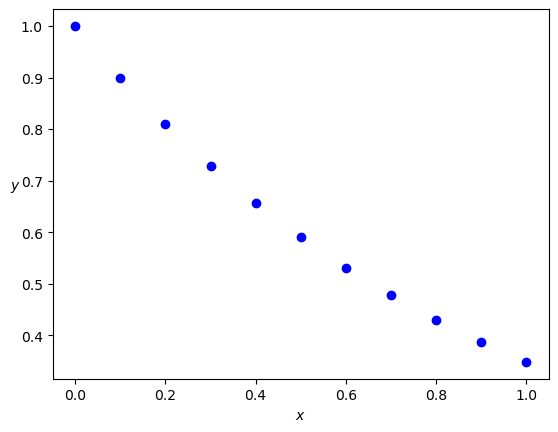

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

L = 1    # length of domain
N = 10   # number of grid points on domain
h = L/N  # step length

def f(x, y):
    return -y       # The derivative of y(x) as a function of x and y

x = np.arange(0, 1+h , h) # Numerical grid
y = np.zeros(len(x))      # Corresponding grid of y values

y[0] = 1  # Initial condition

for i in range(0, N):
    y[i + 1] = y[i] + h*f(x[i], y[i])  # Euler method


plt.plot(x,y, 'bo')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()



Add to this program to make a plot of the analytical solution to the differential equation superimposed on the graph of the numerical solution.  Also, print the difference between the analytical solution and the numerical solution at $x = 1$.  How many grid points do you need to produce a relative error less than 0.1\%?

In [3]:
def solution(x):
    return np.exp(-x)

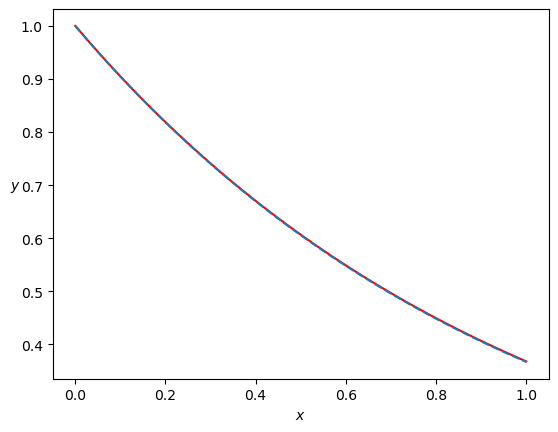

difference at x = 1 is -0.0009702324306912757 
relative error: -0.002637365185729745 
number of grid points: 190


In [29]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

L = 1    # length of domain
N = 190   # number of grid points on domain
h = L/N  # step length

def f(x, y):
    return -y       # The derivative of y(x) as a function of x and y

x = np.arange(0, 1+h , h) # Numerical grid
y = np.zeros(len(x))      # Corresponding grid of y values

y[0] = 1  # Initial condition

for i in range(0, N):
    y[i + 1] = y[i] + h*f(x[i], y[i])  # Euler method

plt.plot(x,solution(x),color='red')
plt.plot(x,y,'--')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()
error = -solution(1) + y[-1]  # compute the error between analytical and numerical solution
rel_error = error/solution(1)
print("difference at x = 1 is",error,'\n' 
      "relative error:", rel_error, '\n'
    "number of grid points:", N)

# A two-step scheme

We can improve the accuracy of the Euler scheme by taking two steps.  The first step executes the normal Euler scheme to the half-way point
to compute
$$
  y_{i+1/2} = y_i + (h/2)*f(x_i, y_i).
$$
The second step calulates derivatives at this half-way point to advance the full step from the starting point
$$
  y_{i+1} = y_i + h*f(x_{i+1/2}, y_{i+1/2}).
$$
Copy the code above into a new cell and adapt it to implement this two-step scheme.  On a single graph, plot the analytical solution and the numerical solution using the two-step scheme.  Comment on what you find.  How many grid points do you need to produce a relative error less than 0.1\%?

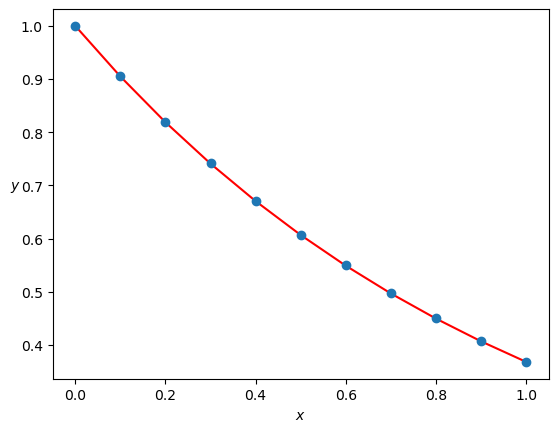

difference at x = 1 is 0.0006615436621095205 
relative error: 0.0017982621154445603 
number of grid points: 10


In [36]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

L = 1    # length of domain
N = 10   # number of grid points on domain
h = L/N  # step length

def f(x, y):
    return -y       # The derivative of y(x) as a function of x and y

x = np.arange(0, 1+h , h) # Numerical grid
y = np.zeros(len(x))      # Corresponding grid of y values
y_m = np.zeros(len(x))
y[0] = 1  # Initial condition
y_m[0] = 1 # This is for the y[i+1/2]
for i in range(0, N):
    y_m[i] = y[i] + (h/2) * f(x[i], y[i])   # compute the y[i+1/2] using the formula
    y[i + 1] = y[i] + (h)*f(x[i] + h/2, y_m[i])  # Euler method, note that x[i+1/2] = x[i] + h/2

plt.plot(x,solution(x),color='red')
plt.plot(x,y,'o')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()

error = -solution(1) + y[-1]  # compute the error between analytical and numerical solution
rel_error = error/solution(1)
print("difference at x = 1 is",error,'\n' 
      "relative error:", rel_error, '\n'
    "number of grid points:", N)

# Similarity solution for a porous-medium gravity current

In this section, we solve the ordinary differential equations governing the similarity solution $f(\eta)$ for a gravity current in a porous medium
$$
  -\hbox{$1\over 3$}f -\hbox{$1\over 3$}\eta f' = (f f')' \qquad \hbox{in} \qquad 0 \le \eta \le \eta_N
$$
with
$$
 f'(0) = 0, \qquad f(\eta_N) = 0 \qquad \hbox{and} \qquad \int_0^{\eta_N} f\, d\eta = 1.
$$
It is convenient to convert this last contraint into a differential equation for the variable
$$
  g = \int_0^\eta f\, d\eta \qquad \hbox{so that} \qquad g' = f.
$$
Note that $g(0) = 0$, while $g(\eta_N) = 1$.

It is also convenient to integrate from the nose of the gravity current $\eta=\eta_N$ back towards the origin, which can be done by introducing the variable $\xi = \eta_N - \eta$.
The differential equations can then be written as a system of three first-order equations for $y_1 = f$, $y_2 = f'$ and $y_3 = g$,
$$
 \eqalign{
  {d y_1\over d\xi} &= y_2 \cr
  {d y_2\over d\xi} &= {{1\over 3}(\eta_N - \xi)y_2 - {1\over 3}y_1 - y_2^2 \over y_1} \cr
  {d y_3\over d\xi} &= -y_1 \cr}.
$$

These equations are subject to initial conditions
$$
  y_1 = 0, \quad y_2 = \hbox{${1\over 3}$}\eta_N, \quad y_3 = 1 \qquad \hbox{at} \qquad \xi=0.
$$
Note also that the singularity that appears in the equation for $dy_2/d\xi$ when $y_1=0$ is a removable singularity and that, in fact, $dy_2/d\xi \to 0$ at the nose of the current $\xi=0$.  This point needs to be treated separately in your program.

Adapt the code for the Euler scheme to integrate these three first-order equations.  Your code should take as input the unknown $\eta_N$ and integrate with respect to $\xi$ from $\xi=0$ to $\xi = \eta_N$.  Run your code several times, varying $\eta_N$ until $g = y_3 = 0$ at $\xi = \eta_N$.

How does your computed value of $\eta_N$ compare with the theoretical value $\eta_N = 9^{1/3}$?  How many grid points do you need to compute $\eta_N$ correctly to three significnat figures?

Make a plot of the computed profile $f(\eta)$ versus the theoretical expression
$$
  f(\eta) = {1\over 6}(\eta_N^2 - \eta^2), \qquad \hbox{with} \qquad \eta_N = 9^{1/3}.
$$

How well is the boundary condition $f'=0$ at $\eta=0$ satisfied by your numerical solution.  Note that this boundary condition was not coded explicitly into the numerical scheme.


/tmp/ipykernel_67045/1409412531.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,y_1, 'bo', label ='$y_1$', color = 'r')
/tmp/ipykernel_67045/1409412531.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,y_2, 'bo', label = '$y_2$', color= 'b')
/tmp/ipykernel_67045/1409412531.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,y_3, 'bo', label ='$y_3$', color = 'orange')


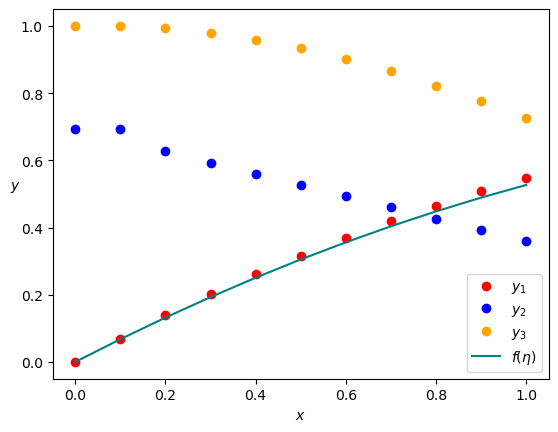

In [48]:
### import math as m
import numpy as np
import matplotlib.pyplot as plt

L = 1    # length of domain
N = 10   # number of grid points on domain
h = L/N  # step length
n = 9**(1/3) # 𝜂𝑁

def f_1(x,y_1, y_2, y_3): # this is the derivative of y1
    return y_2  

def f_2(x,y_1, y_2, y_3):  # this is the derivative of y2
    if x==0 :
        return 0
    return ((1/3)*(n - x)*y_2 - (1/3)*y_1 - y_2**2)/y_1    # this is the derivative of y3

def f_3(x,y_1, y_2, y_3):
    return -y_1

def fn(x):               # this the similarity solution f(eta)
    u = n - x            # change of variable from x to eta (u)
    return (1/6)*(n**2 - u**2)

x = np.arange(0, 1+h , h)   # Numerical grid

y_1 = np.zeros(len(x))      # Corresponding grid of y values
y_2 = np.zeros(len(x))  
y_3 = np.zeros(len(x))  

# Initial conditions
y_1[0] = 0
y_2[0] = n/3
y_3[0] = 1

for i in range(0, N):
    y_1[i + 1] = y_1[i] + h*f_1(x[i], y_1[i], y_2[i], y_3[i])
    y_2[i + 1] = y_2[i] + h*f_2(x[i], y_1[i], y_2[i], y_3[i])
    y_3[i + 1] = y_3[i] + h*f_3(x[i], y_1[i], y_2[i], y_3[i])
    

plt.plot(x,y_1, 'bo', label ='$y_1$', color = 'r')
plt.plot(x,y_2, 'bo', label = '$y_2$', color= 'b')
plt.plot(x,y_3, 'bo', label ='$y_3$', color = 'orange')
plt.plot(x,fn(x), label = '$f(\eta)$', color='teal')
plt.xlabel("$x$")
plt.legend()
plt.ylabel("$y$", rotation=0)
plt.show()

# Solving the diffusion equation as a PDE numerically

##### To solve the diffusion equation
$$
  {\partial h\over\partial t} = {\partial^2 h \over\partial x^2}
$$
numerically we can use a simple Euler method for the time step
$$
  {\partial h\over\partial t} \approx {h^{j+1} - h^j\over \Delta t}
$$
and central differences for the spatial derivatives
$$
 {\partial^2 h \over\partial x^2} \approx {h_{i+1} - 2 h_i + h_{i-1}\over \Delta x^2}.
$$

A code to solve the diffusion equation on the domain $-L \le x \le L$ with initial condition
$$
  h = 1 \quad \hbox{in} \quad -1 \le x \le 1, \qquad h = 0 \quad \hbox{otherwise}
$$
is given below.

The discrete scheme involves the Fourier number $f = D\, \Delta t/ \Delta x^2$.  If $f$ is too large then the scheme is unstable.  In the code below, $f$ has been given the value $f = 0.1$ and it advances by just one time step.

Run the code as it is and observe the results.

Put $f=1$ and run the code again.  What do you observe?

Experiment with diferent values of $f$.  How small must $f$ be to ensure stability?

Now change the control loop from 'for j in range(1, 5)' to 'while y[N+1] > 0.4' and use a value of $f=0.1$.  How does your computed solution compare with the exact solution on an infinite domain
$$
  y = {1\over\sqrt{\pi D t}}e^{-x^2/4Dt}.
$$
Can you improve the agreement by taking smaller time steps (use a smaller Fourier number)or by using more grid points or both?

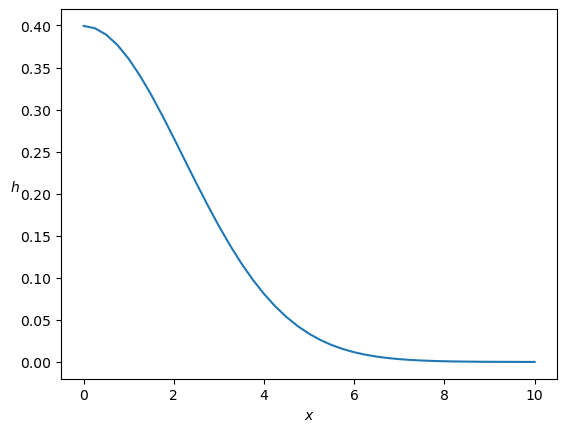

In [24]:
D = 1      # diffusivity
L = 10     # length of half domain
f = 0.1    # Fourier number

N = 40          # number of grid points discretising domain
dx = L/N        # grid spacing
dt = f*dx**2/D  # time step

x = np.arange(-dx, L+dx , dx) # Numerical grid

t = 0
y = np.zeros(len(x))
z = np.zeros(len(x))
w = np.zeros(len(x))

Flux = 0 # Boundary flux

for i in range(1, N+1):
    y[i] = 1 if x[i] <= 1 else 0
y[0] = y[2] + 2*Flux*dx/D
y[N] = 0

while y[1] > 0.4:
#for j in range(1, 5):
    for i in range(1, N):
        z[i] = y[i] + f*(y[i-1] -2*y[i] + y[i+1])
    z[0] = z[2] + 2*Flux*dx/D
    z[N] = 0
    t = t + dt
    y = z

plt.plot(x[1:], y[1:])
plt.xlabel("$x$")
plt.ylabel("$h$", rotation=0)
plt.show()


# Time-evolving gravity current in a porous medium

## In this section, we solve the PDE
$$
  {\partial h\over\partial t} = {\partial\over\partial x}\left(h{\partial h \over\partial x}\right)
$$
by first expanding the derivative on the right-hand side to give
$$
  {\partial h\over\partial t} = h{\partial^2 h \over\partial x^2} + \left({\partial h \over\partial x}\right)^2
$$
and then using a simple Euler method for the time step
$$
  {\partial h\over\partial t} \approx {h^{j+1} - h^j\over \Delta t}
$$
and central differences for the spatial derivatives
$$
 {\partial^2 h \over\partial x^2} \approx {h_{i+1} - 2 h_i + h_{i-1}\over \Delta x^2} \qquad\hbox{and} \qquad
 {\partial h \over\partial x} \approx {h_{i+1} - h_{i-1} \over 2 \Delta x}.
$$

Adapt the code above to solve the nonlinear difusion equation describing the gravity current with the boundary conditions
$$
  {dh\over dx} = 0 \quad\hbox{at}\quad x=0, \qquad h = 0 \quad\hbox{at}\quad x=L
$$
and initial condition
$$
  h = 1 \quad \hbox{in} \quad 0 \le x \le 1, \qquad h = 0 \quad \hbox{otherwise}.
$$

Make a plot of the computed profile $h(x, t)$  versus the theoretical expression $h(x, t) = t^{-1/3}f(x/t^{1/3})$, where
$$
  f(\eta) = {1\over 6}(\eta_N^2 - \eta^2), \qquad \hbox{with} \qquad \eta_N = 9^{1/3}.
$$

Calculate the volume of your computed solution.  How close is it to the original volume of the gravity current?

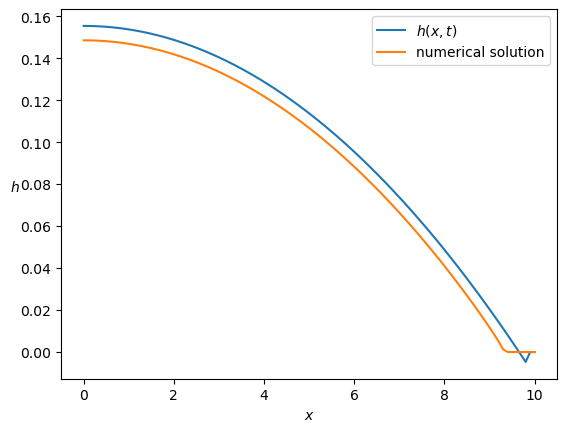

the volume computed is V = 94912.0432962258


In [45]:
D = 1      # diffusivity
L = 10     # length of half domain
f = 0.1    # Fourier number
n = 9**(1/3)
N = 100          # number of grid points discretising domain
dx = L/N        # grid spacing
dt = f*dx**2/D  # time step

x = np.arange(-dx, L+dx , dx) # Numerical grid

t = 0
y = np.zeros(len(x))
z = np.zeros(len(x))
w = np.zeros(len(x))
k = np.zeros(len(x))
Flux = 0 # Boundary flux

for i in range(1, N+1):
    y[i] = 1 if x[i] <= 1 else 0
y[0] = y[2] + 2*Flux*dx/D
y[N] = 0
t = 1
v = 0
while t < 100:
#for j in range(1, 5):
    for i in range(1, N):
        z[i] = y[i] + f*((y[i-1] -2*y[i] + y[i+1])*y[i] + (y[i+1]- y[i-1])**2/4)
        
        # simlarity solution
        k[i] = t**(-1/3)*(1/6) * (n**2 - (x[i]/t**(1/3))**2)  
        
        # volume
        v += dx*(y[i]+y[i-1])/2
    z[0] = z[2] + 2*Flux*dx/D
    z[N] = 0
    t = t + dt
    y = z
    

plt.plot(x[1:], k[1:], label = '$h(x,t)$')
plt.plot(x[1:], y[1:], label = 'numerical solution')
plt.xlabel("$x$")
plt.ylabel("$h$", rotation=0)
plt.legend()
plt.show()
print('the volume computed is V =',v)

# A flux-conserving scheme

Alternatively, we can solve the PDE
$$
  {\partial h\over\partial t} = {\partial\over\partial x}\left(h{\partial h \over\partial x}\right)
$$
in a flux-conservative way by approximating the right-hand side directly using central differences as
$$
 {\partial\over\partial x}\left(h{\partial h \over\partial x}\right) \approx
 {1 \over \Delta x}\left({h_i + h_{i+1} \over 2}{h_{i+1} - h_i \over \Delta x} -
                         {h_{i-1} + h_i \over 2}{h_i - h_{i-1} \over \Delta x} \right) =
    {h_{i+1}^2 - 2 h_i^2 + h_{i-1}^2 \over 2 \Delta x^2}.
$$
Can you see why this is true more straightforwardly?

Adapt the code above to solve the nonlinear difusion equation describing the gravity current with the boundary conditions
$$
  {dh\over dx} = 0 \quad\hbox{at}\quad x=0, \qquad h = 0 \quad\hbox{at}\quad x=L
$$
and initial condition
$$
  h = 1 \quad \hbox{in} \quad 0 \le x \le 1, \qquad h = 0 \quad \hbox{otherwise}.
$$

Make a plot of the computed profile $h(x, t)$  versus the theoretical expression $h(x, t) = t^{-1/3}f(x/t^{1/3})$, where
$$
  f(\eta) = {1\over 6}(\eta_N^2 - \eta^2), \qquad \hbox{with} \qquad \eta_N = 9^{1/3}.
$$

Calculate the volume of your computed solution.  How close is it to the original volume of the gravity current?

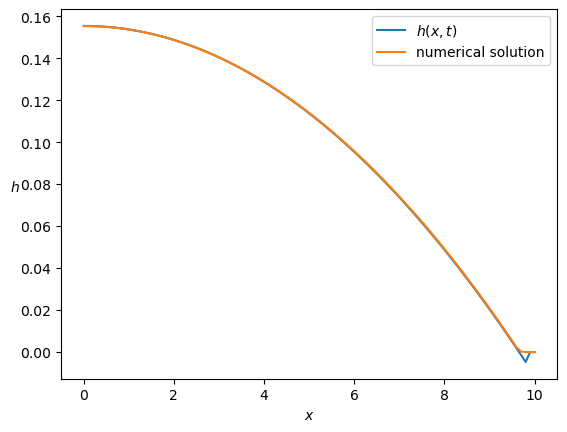

the volume computed is V = 101750.98658788687


In [47]:
D = 1      # diffusivity
L = 10     # length of half domain
f = 0.1    # Fourier number
n = 9**(1/3)
N = 100          # number of grid points discretising domain
dx = L/N        # grid spacing
dt = f*dx**2/D  # time step

x = np.arange(-dx, L+dx , dx) # Numerical grid

t = 0
y = np.zeros(len(x))
z = np.zeros(len(x))
w = np.zeros(len(x))
k = np.zeros(len(x))
Flux = 0 # Boundary flux

for i in range(1, N+1):
    y[i] = 1 if x[i] <= 1 else 0
y[0] = y[2] + 2*Flux*dx/D
y[N] = 0
t = 1
v = 0
while t < 100:
#for j in range(1, 5):
    for i in range(1, N):
        z[i] = y[i] + f*((y[i-1])**2 -2*(y[i])**2 + (y[i+1])**2) / 2 
        
        # simlarity solution
        k[i] = t**(-1/3)*(1/6) * (n**2 - (x[i]/t**(1/3))**2)  
        
        # volume (to be improved)
        v += dx*(y[i]+y[i-1])/2
    z[0] = z[2] + 2*Flux*dx/D
    z[N] = 0
    t = t + dt
    y = z
    
plt.plot(x[1:], k[1:], label = '$h(x,t)$')
plt.plot(x[1:], y[1:], label = 'numerical solution')
plt.xlabel("$x$")
plt.ylabel("$h$", rotation=0)
plt.legend()
plt.show()
print('the volume computed is V =',v)